In [1]:
import pandas as pd
from typing import Type
import sys

sys.path.append("..")
from utils import print_memory_stats, change_obj_to_cat, get_memory_stats

file_name = "game_logs.csv"
column_types_path = "column_types.pkl"
ten_columns_path = "10_columns.csv"


def change_types(my_df: pd.DataFrame):
    memory_stats = get_memory_stats(my_df, file_name)
    print_memory_stats(memory_stats[0], memory_stats[1], memory_stats[2], "mem_res_no_opt.json")
    print("before:")
    print(my_df.info(memory_usage="deep"))
    change_obj_to_cat(my_df)
    memory_stats = get_memory_stats(my_df, file_name)
    print_memory_stats(memory_stats[0], memory_stats[1], memory_stats[2], "mem_res_opt.json")
    print("after:")
    print(my_df.info(memory_usage="deep"))


def save_10_columns(my_df: pd.DataFrame):
    column_names = [
        "date",
        "number_of_game",
        "day_of_week",
        "park_id",
        "v_manager_name",
        "length_minutes",
        "v_hits",
        "h_hits",
        "h_walks",
        "h_errors",
    ]
    types = my_df.dtypes.to_dict()
    first_chunk = True
    for chunk in pd.read_csv(
        file_name,
        usecols=lambda x: x in column_names,
        dtype=types,
        chunksize=100_000,
    ):
        chunk.to_csv(ten_columns_path, mode= 'w' if first_chunk else 'a', header=first_chunk, index=False)
        first_chunk = False

    with open(column_types_path, "wb") as file:
        pd.to_pickle(types, file)


my_df = pd.read_csv(file_name)
change_types(my_df)
save_10_columns(my_df)

with open(column_types_path, "rb") as file:
    loaded_column_types = pd.read_pickle(file)
df = pd.read_csv(ten_columns_path, dtype=loaded_column_types)
df

,date,number_of_game,day_of_week,park_id,length_minutes,v_hits,h_hits,h_walks,h_errors,v_manager_name
0,18710504,0,Thu,FOR01,120.0,4.0,4.0,1.0,3.0,Charlie Pabor
1,18710505,0,Fri,WAS01,145.0,13.0,14.0,10.0,10.0,Harry Wright
2,18710506,0,Sat,RCK01,140.0,11.0,7.0,0.0,13.0,Charlie Pabor
3,18710508,0,Mon,CHI01,150.0,15.0,11.0,4.0,7.0,Charlie Pabor
4,18710509,0,Tue,TRO01,145.0,17.0,9.0,3.0,7.0,Harry Wright
...,...,...,...,...,...,...,...,...,...,...
171902,20161002,0,Sun,DEN02,203.0,10.0,13.0,3.0,0.0,Craig Counsell
171903,20161002,0,Sun,PHI13,159.0,8.0,10.0,2.0,0.0,Terry Collins
171904,20161002,0,Sun,SFO03,184.0,4.0,16.0,4.0,0.0,Dave Roberts
171905,20161002,0,Sun,STL10,192.0,9.0,12.0,4.0,0.0,Clint Hurdle


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Game Length (minutes)')

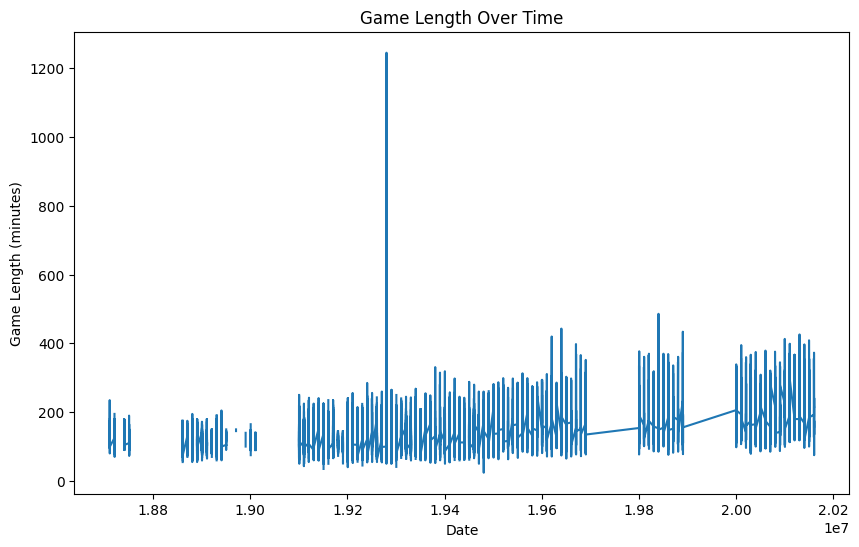

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['length_minutes'])
plt.title('Game Length Over Time')
plt.xlabel('Date')
plt.ylabel('Game Length (minutes)')

Text(0, 0.5, 'Number of Games')

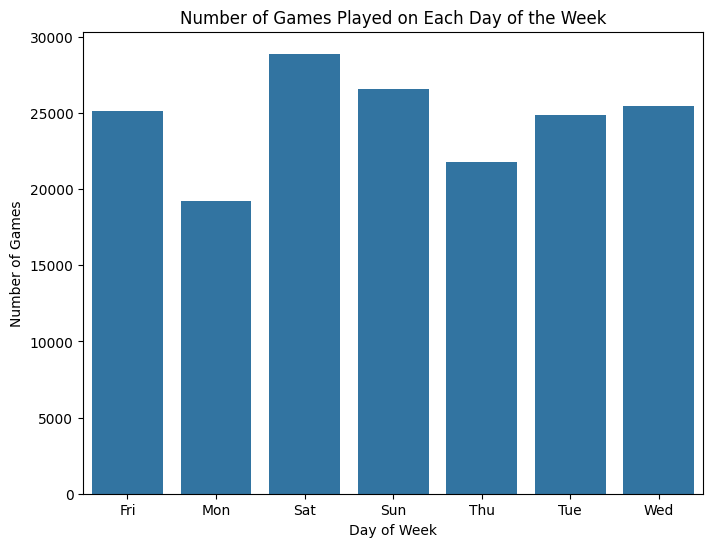

In [4]:
plt.figure(figsize=(8, 6))
sns.countplot(x='day_of_week', data=df)
plt.title('Number of Games Played on Each Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Games')

Text(0, 0.5, '')

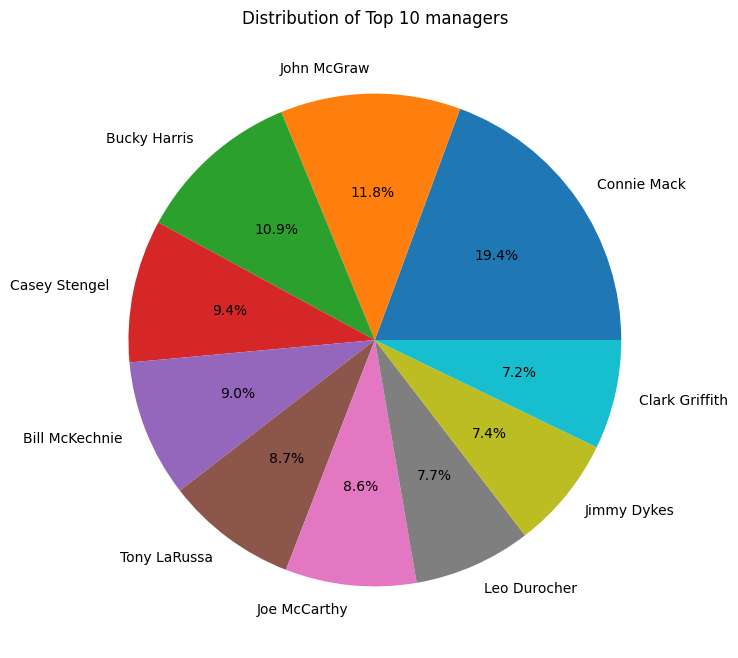

In [11]:
top_managers = df['v_manager_name'].value_counts().nlargest(10)

plt.figure(figsize=(8, 8))
df['v_manager_name'].value_counts().nlargest(10).plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Top 10 managers')
plt.ylabel('')

Text(0, 0.5, 'Visiting Hits')

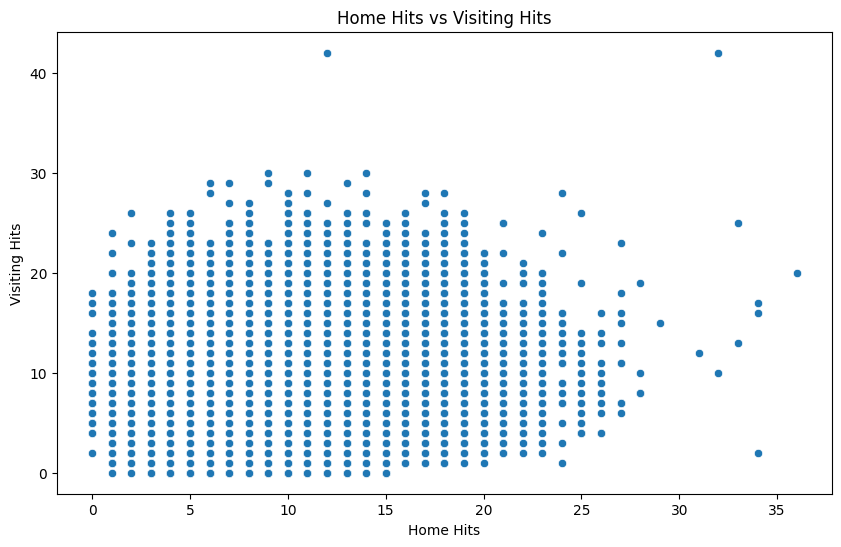

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='h_hits', y='v_hits', data=df)
plt.title('Home Hits vs Visiting Hits')
plt.xlabel('Home Hits')
plt.ylabel('Visiting Hits')

(0.0, 400.0)

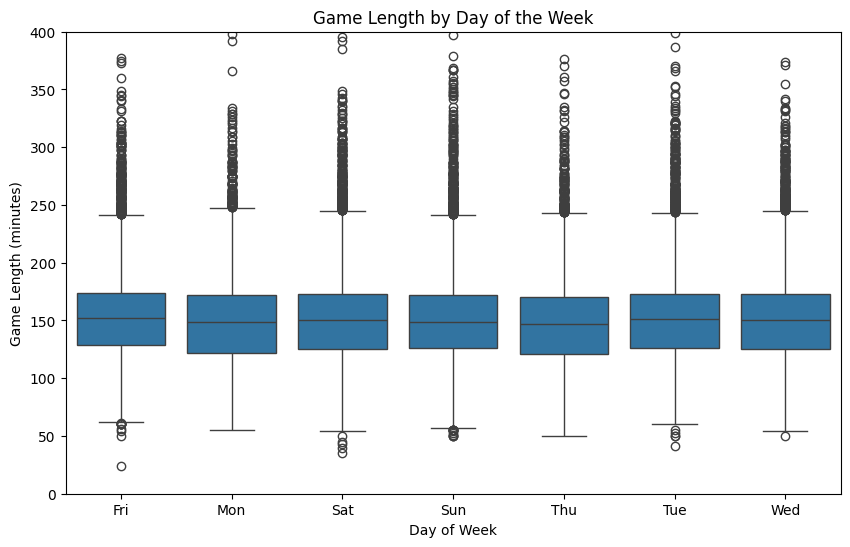

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='day_of_week', y='length_minutes', data=df)
plt.title('Game Length by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Game Length (minutes)')
plt.ylim(0, 400)

(0.0, 400.0)

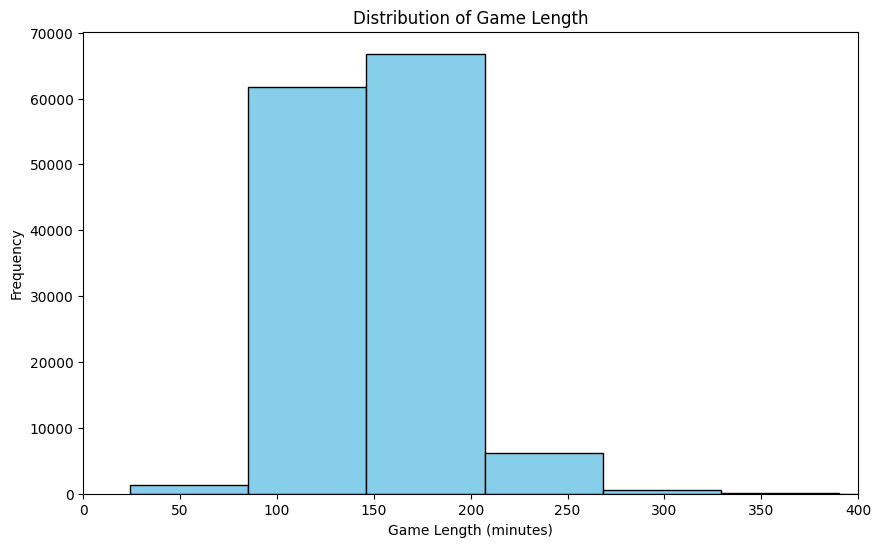

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(df['length_minutes'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Game Length')
plt.xlabel('Game Length (minutes)')
plt.ylabel('Frequency')
plt.xlim(0,400)